# Example from the Lecture

In [1]:
# Import relevant libs

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
# Load data

raw_data = pd.read_csv('real_life_example.csv')

In [3]:
# Check the data fields

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


We can see we currently have 4 numerical fields and 5 categorical ones.  
Let's check the numerical values.

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


We can see that this data is probably from 2016 since that is the most recent year and that this data contains both used and new vehicles.  
There are 7 brands, 6 body types, 4 engine types, 312 different models and 2 registration states.   
The price displays a lot of variance which can be observed by the the standard deviation being larger than the mean itself, this is probably due to the fact that economic cars dominate the market and their used counterparts are very cheap when compared to some of the upper-end luxury brands.  
Engine volume has some interesting information as well, it is saying that the standard deviation is 5 when the mean is 2.7, this doesn't seem right and by observing the max value we can see the max value for the engine volume is 99, this is not a realistic value for domestic vehicles' engine volume and should have something going on.  
There are also some missing values on price and engine volume.

In [5]:
# Remove non relevant data

data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
# Check null values

data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

We have only a small number of missing values and they don't represent a large portion of the data we can remove it (rule of thumb is if they represent <5% of the total data).

In [7]:
# Remove missing values

data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

Let's now explore the values themselves

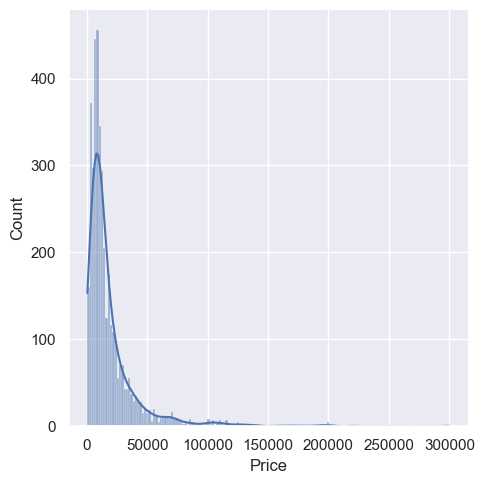

In [8]:
sns.displot(data_no_mv['Price'], kde=True)

This result was to be expected, as seen on the describe method for the data 71% of the vehicles had a price bellow 21.700 so there are a lot of outliers in this data. Let's try to handle them.

In [9]:
q_price = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q_price]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


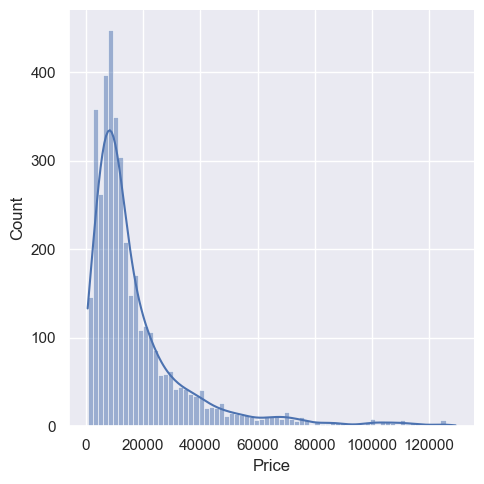

In [10]:
sns.displot(data_1['Price'], kde=True)

By removing the top 1% of vehicles by price we have greatly improved the quality of our data.  
Let's do the same for the other fields that share the same issue.

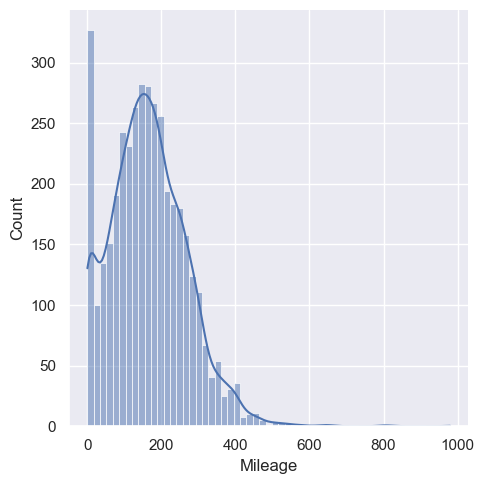

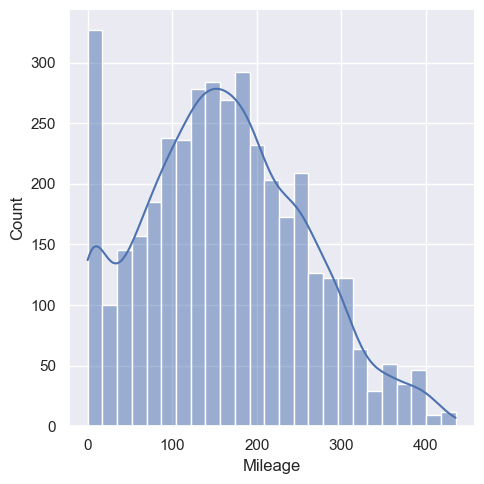

In [11]:
sns.displot(data_1['Mileage'], kde=True)
q_mileage = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q_mileage]
sns.displot(data_2['Mileage'], kde=True)

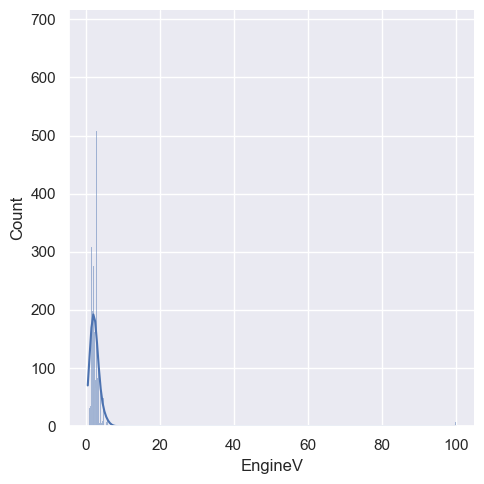

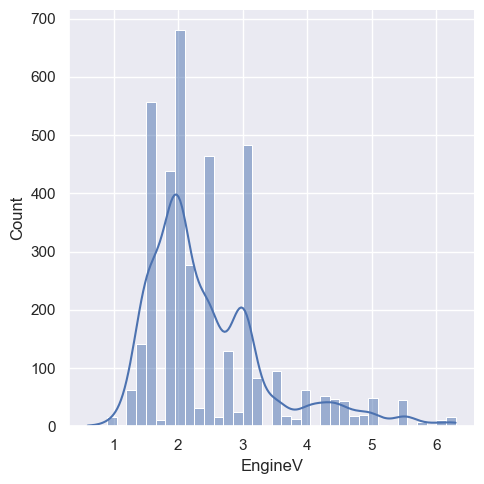

In [12]:
# For the engine we can just use the regular largest value for engine sizes which after researching should be 6.5

sns.displot(data_2['EngineV'], kde=True)
data_3 = data_2[data_2['EngineV'] < 6.5]
sns.displot(data_3['EngineV'], kde=True)

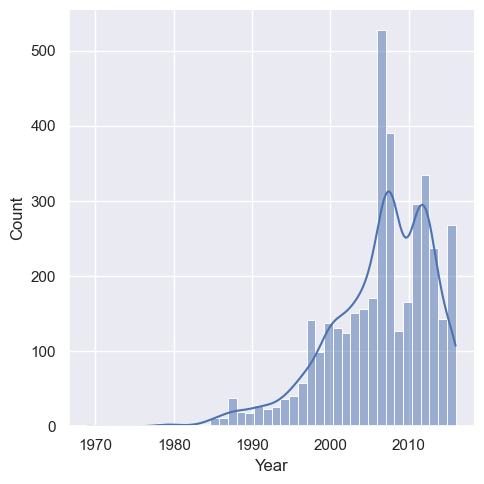

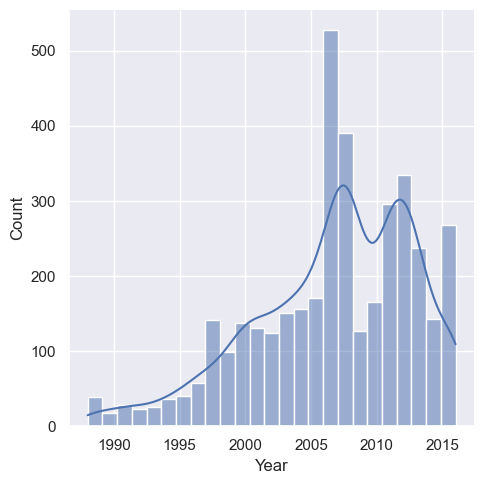

In [13]:
# Year is different since the outliers are on the low-end so we need to remove the fist percentile
sns.displot(data_3['Year'], kde=True)
q_year = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q_year]
sns.displot(data_4['Year'], kde=True)

In [14]:
data_clean = data_4.reset_index(drop=True)
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


We can see that the data is looking much better now after getting cleaned.

## Now let's check the OLS assumptions

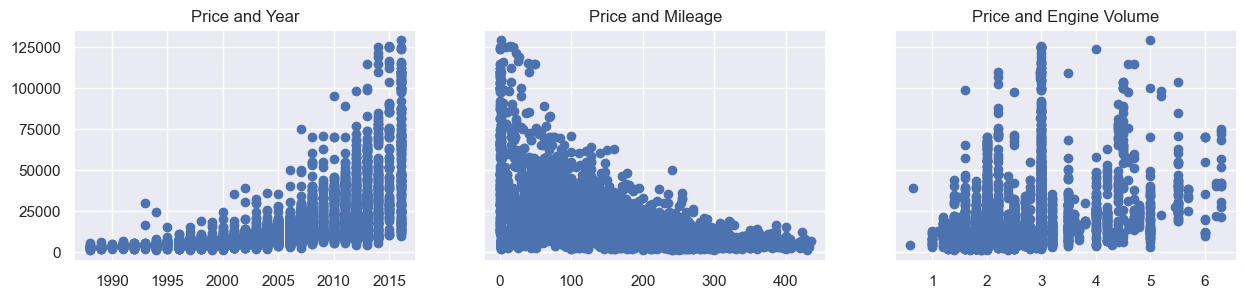

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_clean['Year'], data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['Mileage'], data_clean['Price'])
ax2.set_title('Price and Mileage')
ax3.scatter(data_clean['EngineV'], data_clean['Price'])
ax3.set_title('Price and Engine Volume')
plt.show()

Recalling that price was an exponential distribution we should try to apply a log operation on it to try and make it more linear.

In [16]:
log_price = np.log(data_clean['Price'])
data_clean['log_price'] = log_price

Let's plot the relations again against the new log price.

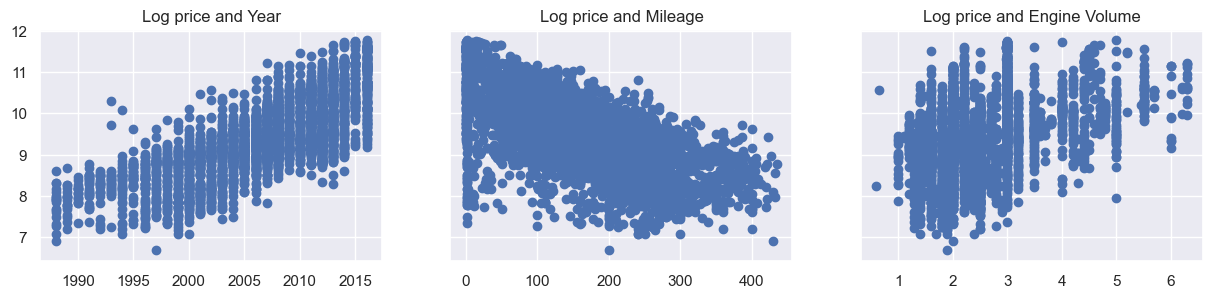

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))
ax1.scatter(data_clean['Year'], data_clean['log_price'])
ax1.set_title('Log price and Year')
ax2.scatter(data_clean['Mileage'], data_clean['log_price'])
ax2.set_title('Log price and Mileage')
ax3.scatter(data_clean['EngineV'], data_clean['log_price'])
ax3.set_title('Log price and Engine Volume')
plt.show()

We can now observe more linear relations between the data.  
Mileage and year should have some multicollinearity so let's check that.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vars = data_clean[['Year', 'Mileage', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vars.values, i) for i in range(vars.shape[1])]
vif['features'] = vars.columns
vif

,VIF,features
0,10.354854,Year
1,3.791584,Mileage
2,7.662068,EngineV


It seems year has too strong of a correlation with other variables and that will affect our regression, we should remove it. http://statisticalhorizons.com/multicollinearity

In [19]:
data_no_multicol = data_clean.drop(['Year'], axis=1)

## Now let's handle dummy variables

In [20]:
data_w_dummies = pd.get_dummies(data_no_multicol, drop_first=True)

In [21]:
data_w_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.0,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.0,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.0,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [22]:
# Prove no multicollinearity with each other

from statsmodels.stats.outliers_influence import variance_inflation_factor
vars = data_w_dummies[['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(vars.values, i) for i in range(vars.shape[1])]
vif['features'] = vars.columns
vif

,VIF,features
0,0.001603,Brand_BMW
1,0.001325,Brand_Mercedes-Benz
2,0.003311,Brand_Mitsubishi
3,0.002315,Brand_Renault
4,0.002008,Brand_Toyota
5,0.001179,Brand_Volkswagen


## Let's pre-process the data now

In [23]:
data_w_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [24]:
# Reorder or remove columns here if wanted, removing price since we will use log_price
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_w_dummies[cols]

In [25]:
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [26]:
# Define the target and input

y = data_preprocessed['log_price']
x = data_preprocessed.drop(['log_price'], axis=1)

In [27]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [28]:
x_scaled = scaler.transform(x)

## Now let's split the data

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=123)

## Now the regression

In [30]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [31]:
y_hat = reg.predict(x_train)

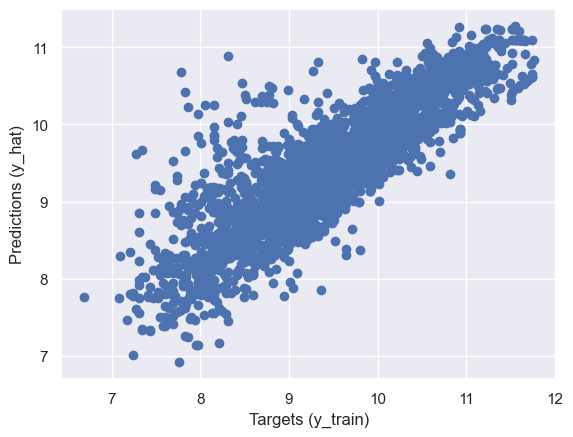

In [32]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()

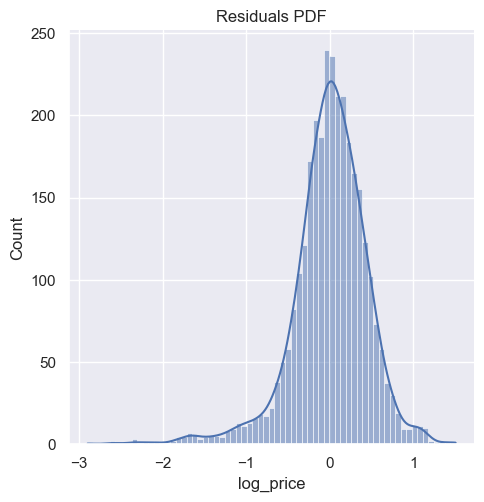

In [33]:
# Check the residuals
sns.displot(y_train - y_hat, kde=True)
plt.title('Residuals PDF')
plt.show()

We can see that the error is normally distributed and the mean is zero. The outliers show us there is more overestimation rather than underestimation, this is probably due to a larger amount of cheaper cars making it hard for the model to underestimate those, given that the outliers of the data set where more expensive cars.

In [34]:
reg.score(x_train, y_train)

0.7401317682336556

## Find weights and bias

In [35]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.452475
1,EngineV,0.215174
2,Brand_BMW,0.015917
3,Brand_Mercedes-Benz,0.015779
4,Brand_Mitsubishi,-0.137516
5,Brand_Renault,-0.180455
6,Brand_Toyota,-0.053688
7,Brand_Volkswagen,-0.085713
8,Body_hatch,-0.146901
9,Body_other,-0.106714


In [36]:
br = data_clean['Brand'].unique()
bo = data_clean['Body'].unique()
en = data_clean['Engine Type'].unique()
print(br, bo, en)

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi'] ['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch'] ['Petrol' 'Diesel' 'Gas' 'Other']


We can verify that the benchmark dummies were Audi, Crossover and Diesel, if the weights are bigger than the benchmark counterpart it means that the value of said dummy is bigger than the benchmark, and vice-versa.  
Ex. Crossover is more expensive than Hatch.

## Now let's test the data

In [37]:
y_hat_test = reg.predict(x_test)

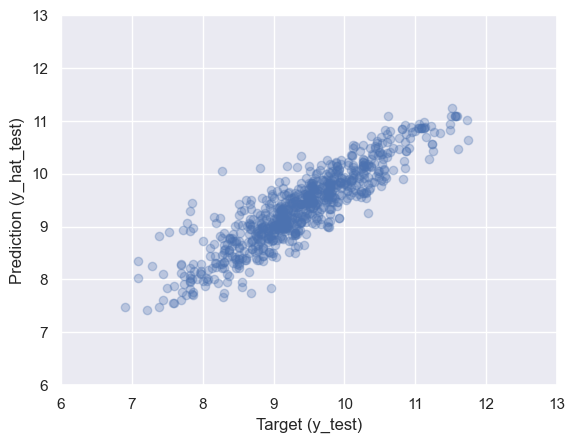

In [38]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel('Target (y_test)')
plt.ylabel('Prediction (y_hat_test)')
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [39]:
# Lets manually compare the price predictions

# We have to do the exponential to revert the logarithm on prices
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_performance.head()

,Prediction
0,16826.776277
1,3971.530257
2,28023.942177
3,10112.159901
4,7134.564833


In [40]:
y_test_compare = y_test.reset_index(drop=True)
y_test_compare.head()

0     9.384294
1     7.972466
2    10.839581
3     9.190138
4     9.301095
Name: log_price, dtype: float64

In [41]:
df_performance['Target'] = np.exp(y_test_compare)
df_performance

,Prediction,Target
0,16826.776277,11900.0
1,3971.530257,2900.0
2,28023.942177,51000.0
3,10112.159901,9800.0
4,7134.564833,10950.0
...,...,...
769,27573.132128,28700.0
770,21219.078598,34500.0
771,9891.605619,12350.0
772,2754.594502,2300.0


In [42]:
df_performance['Residuals'] = df_performance['Target'] - df_performance['Prediction']
df_performance['Diff %'] = df_performance['Residuals']/df_performance['Target']*100
df_performance

,Prediction,Target,Residuals,Diff %
0,16826.776277,11900.0,-4926.776277,-41.401481
1,3971.530257,2900.0,-1071.530257,-36.949319
2,28023.942177,51000.0,22976.057823,45.051094
3,10112.159901,9800.0,-312.159901,-3.185305
4,7134.564833,10950.0,3815.435167,34.844157
...,...,...,...,...
769,27573.132128,28700.0,1126.867872,3.926369
770,21219.078598,34500.0,13280.921402,38.495424
771,9891.605619,12350.0,2458.394381,19.906027
772,2754.594502,2300.0,-454.594502,-19.764978


Overall the model was ok predicting the price of the car but it struggled with low-cost cars, this may be due to some information we didn't have such as the state of the car or the model which we dropped, although including the model could have done more harm than good since we probably don't have enough data for such specific analysis.